In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Video
import random
import cv2
import os
import numpy as np


In [ ]:
NUMBER_OF_IMAGES = 3
TIME_STEPS = 10

image_folder = "/MRI-Segmentation-Preprocess/Brain Tumor Segmentation/images"
mask_folder = "/MRI-Segmentation-Preprocess/Brain Tumor Segmentation/masks"

In [3]:
def save_spike_train_animation(spike_train, save_path="spike_train.gif"):
    """
    Saves the spike train animation as a GIF file.
    """
    fig, ax = plt.subplots()
    im = ax.imshow(spike_train[0] * 255, cmap='gray')
    ax.set_title("Spike Train Animation")
    ax.axis("off")
    
    def update(frame):
        im.set_array(spike_train[frame] * 255)
        return [im]
    
    ani = animation.FuncAnimation(fig, update, frames=TIME_STEPS, interval=200, blit=True)
    ani.save(save_path, writer="pillow", fps=5) 
    plt.close(fig)


def temporal_coding(image, timesteps=10):
    normalized_img = image / 255.0  
    spike_train = np.zeros((timesteps, *image.shape), dtype=np.uint8)

    for t in range(timesteps):
        spike_train[t] = (normalized_img > (1 - (t / timesteps))).astype(np.uint8)

    return spike_train


def rate_coding(image, timesteps=10):
    normalized_img = image / 255.0  
    spike_train = np.random.rand(timesteps, *image.shape) < normalized_img 
    return spike_train.astype(np.uint8)


def display_images():
    image_files = os.listdir(image_folder)
    random_files = random.sample(image_files, NUMBER_OF_IMAGES)

    fig, axes = plt.subplots(NUMBER_OF_IMAGES, 4, figsize=(20, 15))
    if NUMBER_OF_IMAGES == 1:
        axes = np.array([axes])

    for i, file_name in enumerate(random_files):
        image_path = os.path.join(image_folder, file_name)
        mask_path = os.path.join(mask_folder, file_name)

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        display_size_w = image.shape[1]
        display_size_h = image.shape[0]

        display_size_w_64 = 64
        display_size_h_64 = 64

        display_size_w_128 = 128
        display_size_h_128 = 128


        image = cv2.resize(image, (display_size_w, display_size_h))
        mask = cv2.resize(mask, (display_size_w, display_size_h))

        # image = cv2.resize(image, (display_size_w_64, display_size_h_64))
        # mask = cv2.resize(mask, (display_size_w_64, display_size_h_64))


        # image = cv2.resize(image, (display_size_w_128, display_size_h_128))
        # mask = cv2.resize(mask, (display_size_w_128, display_size_h_128))

        overlay = image.copy()
        overlay[mask > 0] = [255]

        spike_train = rate_coding(image, TIME_STEPS)
        # spike_train = temporal_coding(image, TIME_STEPS)

        axes[i, 0].imshow(image, "gray")
        axes[0, 0].set_title("Brain MRI")

        axes[i, 1].imshow(mask, "gray")
        axes[0, 1].set_title("Mask")

        axes[i, 2].imshow(overlay)
        axes[0, 2].set_title("Image + Mask Overlay")

        axes[i, 3].imshow(spike_train[0] * 255, cmap='gray')
        axes[0, 3].set_title("Spike Train (t=0)")

        # Remove axes
        for j in range(4):
            axes[i, j].axis("off")

        # if i == 0:
        #     save_spike_train_animation(spike_train, "spike_train.gif")


    plt.tight_layout()
    plt.show()

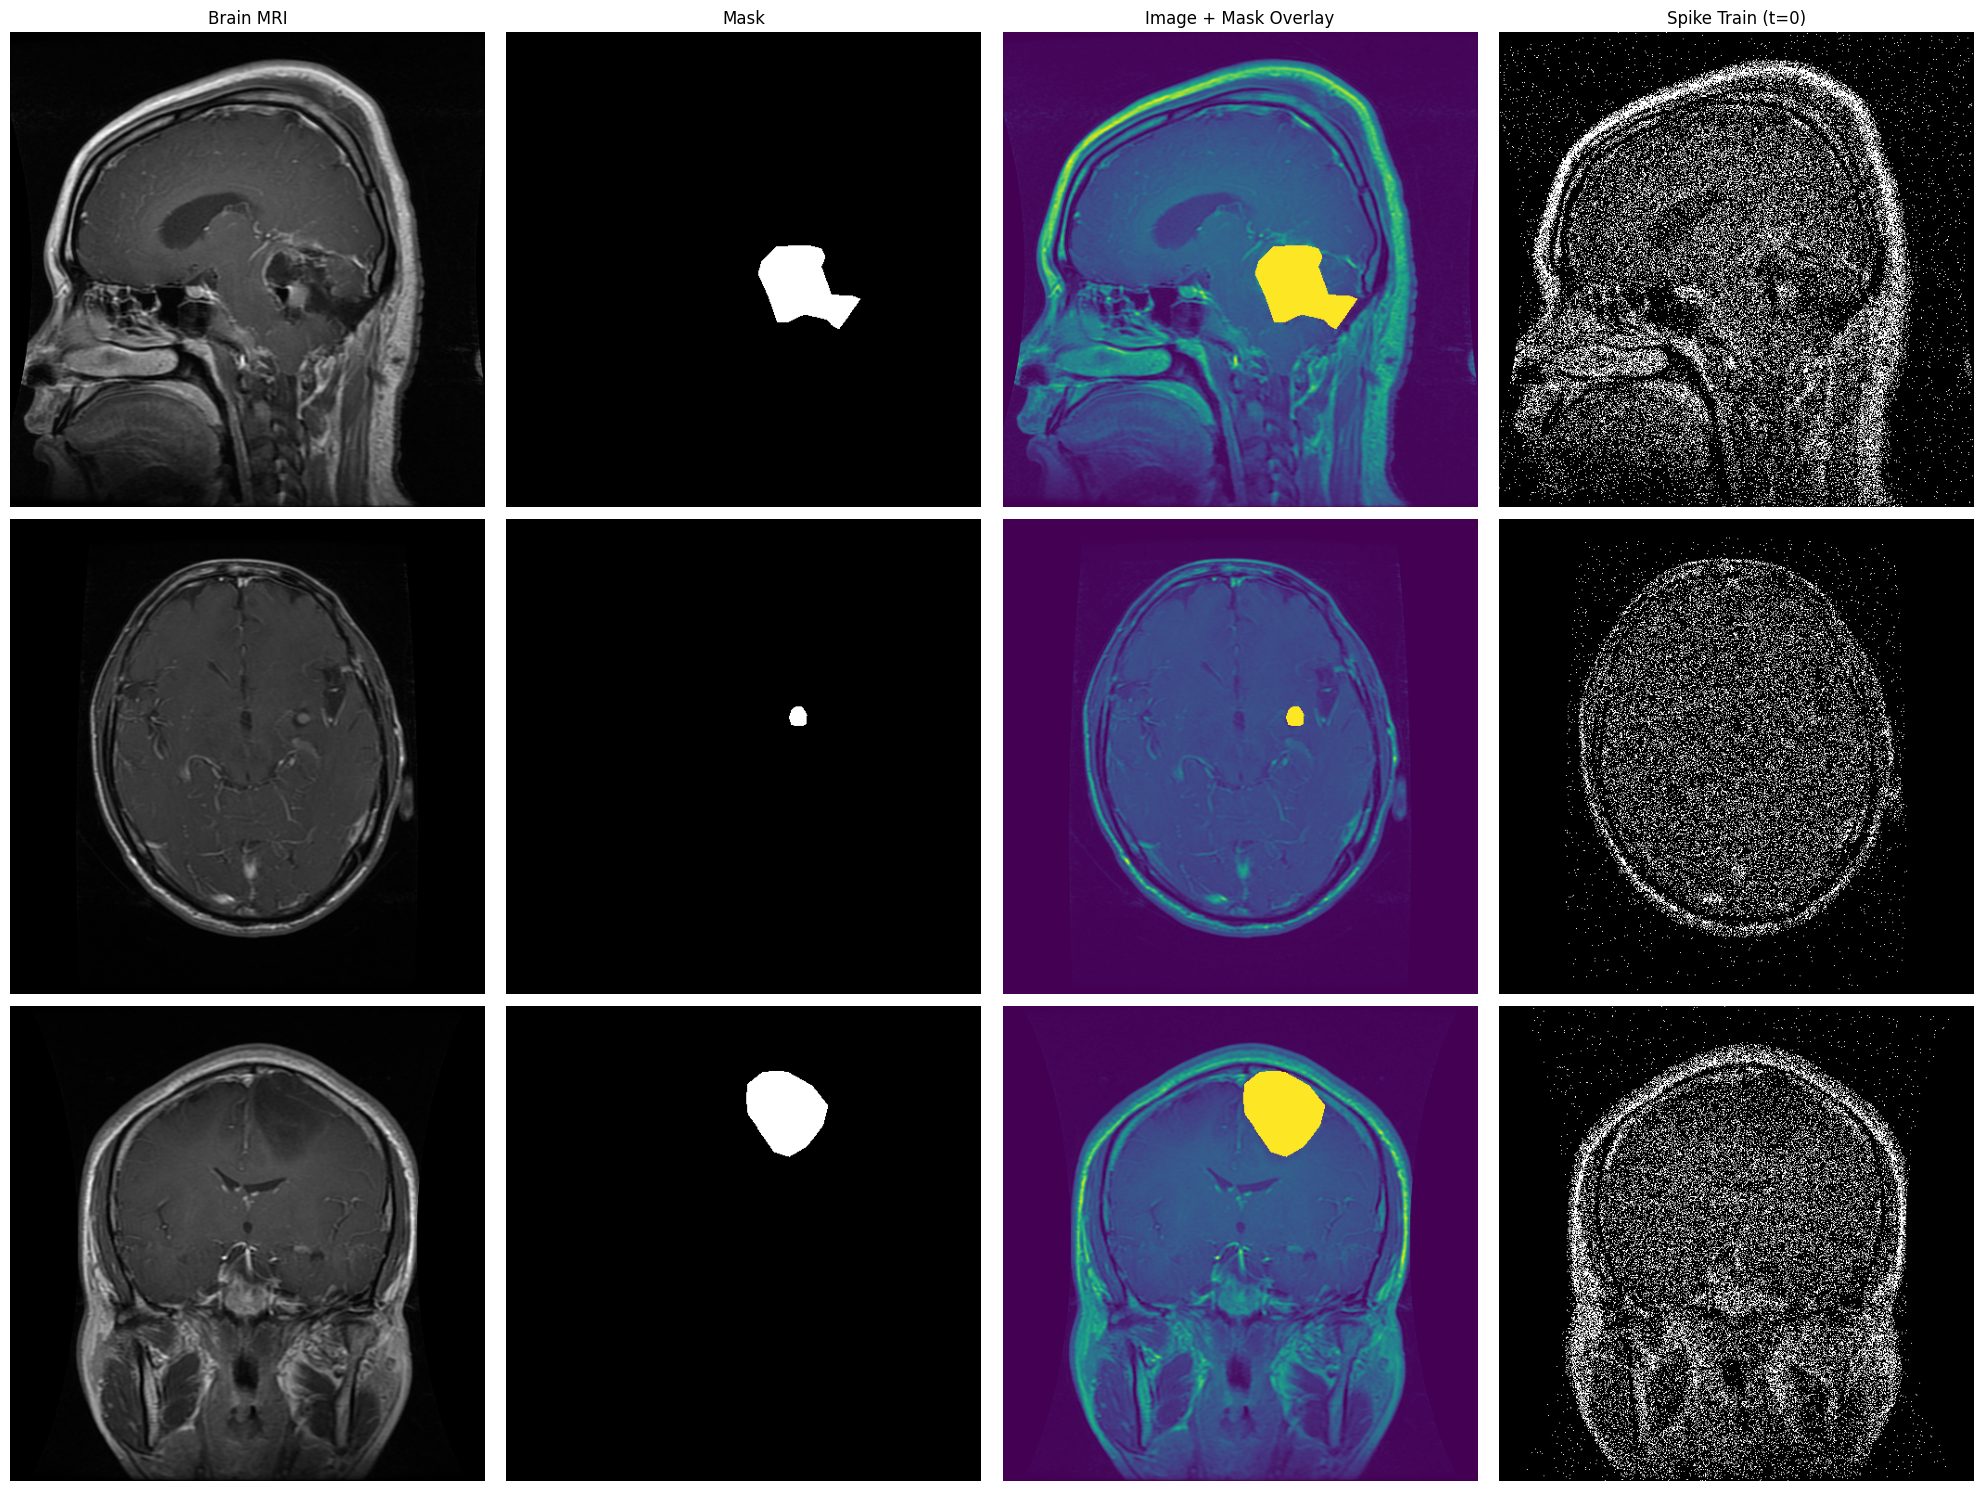

In [4]:
display_images()